<a href="https://colab.research.google.com/github/hamza60150/Future-Sales-Predictions-Using-ML-Algorithms/blob/main/Machine_Learning_Algorithms_on_Walmart_dataset_27653.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Simple Walkthrough - Walmart Sales Forecasting**

# **1. Import Libraries & Set up Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import math
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor

<ipython-input-74-4a7676b1f8fa>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
# Load Excel file into a pandas DataFrame
df_f= pd.read_csv(file_name)

Saving features.csv to features (1).csv


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
# Load Excel file into a pandas DataFrame
df_st= pd.read_csv(file_name)

Saving stores.csv to stores (1).csv


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
# Load Excel file into a pandas DataFrame
df_train= pd.read_csv(file_name)

Saving train.csv to train (1).csv


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
# Load Excel file into a pandas DataFrame
df_test= pd.read_csv(file_name)

Saving test.csv to test (1).csv


In [ ]:
df_test.head(3)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [ ]:
# Make date column into datetime
df_f["Date"] = pd.to_datetime(df_f["Date"])
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_test["Date"] = pd.to_datetime(df_test["Date"])

# Test if it works
print(df_train[0:1].Date, df_train[-1:].Date)
print(df_test[0:1].Date, df_test[-1:].Date)
print(df_f[0:1].Date, df_f[-1:].Date)




0   2010-02-05
Name: Date, dtype: datetime64[ns] 421569   2012-10-26
Name: Date, dtype: datetime64[ns]
0   2012-11-02
Name: Date, dtype: datetime64[ns] 115063   2013-07-26
Name: Date, dtype: datetime64[ns]
0   2010-02-05
Name: Date, dtype: datetime64[ns] 8189   2013-07-26
Name: Date, dtype: datetime64[ns]


In [ ]:
# Assess the total amount of columns and rows in a more consise way
print(df_f.shape)
print(df_train.shape)
print(df_test.shape)
print(df_st.shape)

(8190, 12)
(421570, 5)
(115064, 4)
(45, 3)


In [ ]:
# Merging training data
df_all_train = df_train.merge(df_f, how="left", on=["Store","Date","IsHoliday"])
#df_all_train.head(3)

# Merging test data
df_all_test = df_test.merge(df_f, how="left", on=["Store","Date","IsHoliday"])
df_all_test.tail(3)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN
115063,45,98,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN


In [ ]:
# More merging of training data
df_all_train = df_all_train.merge(df_st, how="left", on=["Store"])
df_all_train.head(3)

# More merging of test data
df_all_test = df_all_test.merge(df_st, how="left", on=["Store"])
#df_all_test.head(3)

In [ ]:
# Check how our final df_all_train looks
print("Rows & Columns: ", df_all_train.shape, "\nAll columns if the df: ", df_all_train.columns.tolist())

# # Check how our final df_all_test looks
print("Rows & Columns: ", df_all_test.shape, "\nAll columns if the df: ", df_all_test.columns.tolist())

Rows & Columns:  (421570, 16) 
All columns if the df:  ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']
Rows & Columns:  (115064, 15) 
All columns if the df:  ['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size']


In [ ]:
df_all_train = df_all_train.map(lambda x: 1 if x == True else x)
df_all_train = df_all_train.map(lambda x: 0 if x == False else x)

df_all_test = df_all_test.map(lambda x: 1 if x == True else x)
df_all_test = df_all_test.map(lambda x: 0 if x == False else x)

In [ ]:
# Checking the DFs
df_all_train.head(3)
#df_all_test.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


In [ ]:
# Check where we find NaN values

tab_info = pd.DataFrame(df_all_train.dtypes).T.rename(index={0:'column Type'})
tab_info = pd.concat([tab_info, pd.DataFrame(df_all_train.isnull().sum()).T.rename(index={0:'null values (nb)'})]) # Use concat instead of append
tab_info = pd.concat([tab_info, pd.DataFrame(df_all_train.isnull().sum()/df_all_train.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'})]) # Use concat instead of append
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,270889,310322,284479,286603,270138,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.257181,73.611025,67.480845,67.984676,64.079038,0.0,0.0,0.0,0.0


In [ ]:
#replace Temperature, fule price, CPI and unemployment with averages.
# This seems more reasonable than replacing them with "0"s.
df_all_train[["Temperature"]] = df_all_train[["Temperature"]].fillna(df_all_train[["Temperature"]].mean())
df_all_train[["Fuel_Price"]] = df_all_train[["Fuel_Price"]].fillna(df_all_train[["Fuel_Price"]].mean())
df_all_train[["CPI"]] = df_all_train[["CPI"]].fillna(df_all_train[["CPI"]].mean())
df_all_train[["Unemployment"]] = df_all_train[["Unemployment"]].fillna(df_all_train[["Unemployment"]].mean())

df_all_test[["Temperature"]] = df_all_test[["Temperature"]].fillna(df_all_test[["Temperature"]].mean())
df_all_test[["Fuel_Price"]] = df_all_test[["Fuel_Price"]].fillna(df_all_test[["Fuel_Price"]].mean())
df_all_test[["CPI"]] = df_all_test[["CPI"]].fillna(df_all_train[["CPI"]].mean())
df_all_test[["Unemployment"]] = df_all_test[["Unemployment"]].fillna(df_all_test[["Unemployment"]].mean())

In [ ]:
# Check the results
df_all_train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315


In [ ]:
# Replace the NaN values in markdown with 0
df_all_train = df_all_train.fillna(0)
df_all_test = df_all_test.fillna(0)

In [ ]:
# Check the results
df_all_train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315


In [ ]:
# Check NaN values in df_all_train

tab_info = pd.DataFrame(df_all_train.dtypes).T.rename(index={0:'column Type'})
tab_info = pd.concat([tab_info, pd.DataFrame(df_all_train.isnull().sum()).T.rename(index={0:'null values (nb)'})]) # Use concat instead of append
tab_info = pd.concat([tab_info, pd.DataFrame(df_all_train.isnull().sum()/df_all_train.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'})]) # Use concat instead of append
tab_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Check NaN values in df_all_test

tab_info = pd.DataFrame(df_all_test.dtypes).T.rename(index={0:'column Type'})
tab_info = pd.concat([tab_info, pd.DataFrame(df_all_test.isnull().sum()).T.rename(index={0:'null values (nb)'})]) # Use concat instead of append
tab_info = pd.concat([tab_info, pd.DataFrame(df_all_test.isnull().sum()/df_all_test.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'})]) # Use concat instead of append
tab_info

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column Type,int64,int64,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_all_train = pd.get_dummies(df_all_train, columns=["Type"])
df_all_test = pd.get_dummies(df_all_test, columns=["Type"])

In [ ]:
df_all_train[['Type_A', 'Type_B', 'Type_C']] = df_all_train[['Type_A', 'Type_B', 'Type_C']].astype(int)
df_all_test[['Type_A', 'Type_B', 'Type_C']] = df_all_test[['Type_A', 'Type_B', 'Type_C']].astype(int)

In [ ]:
# Checking the DFs after all of the processing
df_all_train.head(3)
#df_all_test.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,1,0,0
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,1,0,0
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,1,0,0


# **2. Data Exploration**

In [ ]:
# Start with simple .describe() to get the general jist of the dataframe
df_all_train.describe()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type_A,Type_B,Type_C
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,0.511132,0.387824,0.101044
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,0.000000,0.000000,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,0.000000,0.000000,0.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,1.000000,0.000000,0.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,1.000000,1.000000,0.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,1.000000,1.000000,1.000000
std,12.785297,30.492054,NaN,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,0.499877,0.487255,0.301387


<ipython-input-104-54ca13cd62ea>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_all_train.resample('M', on='Date').mean()


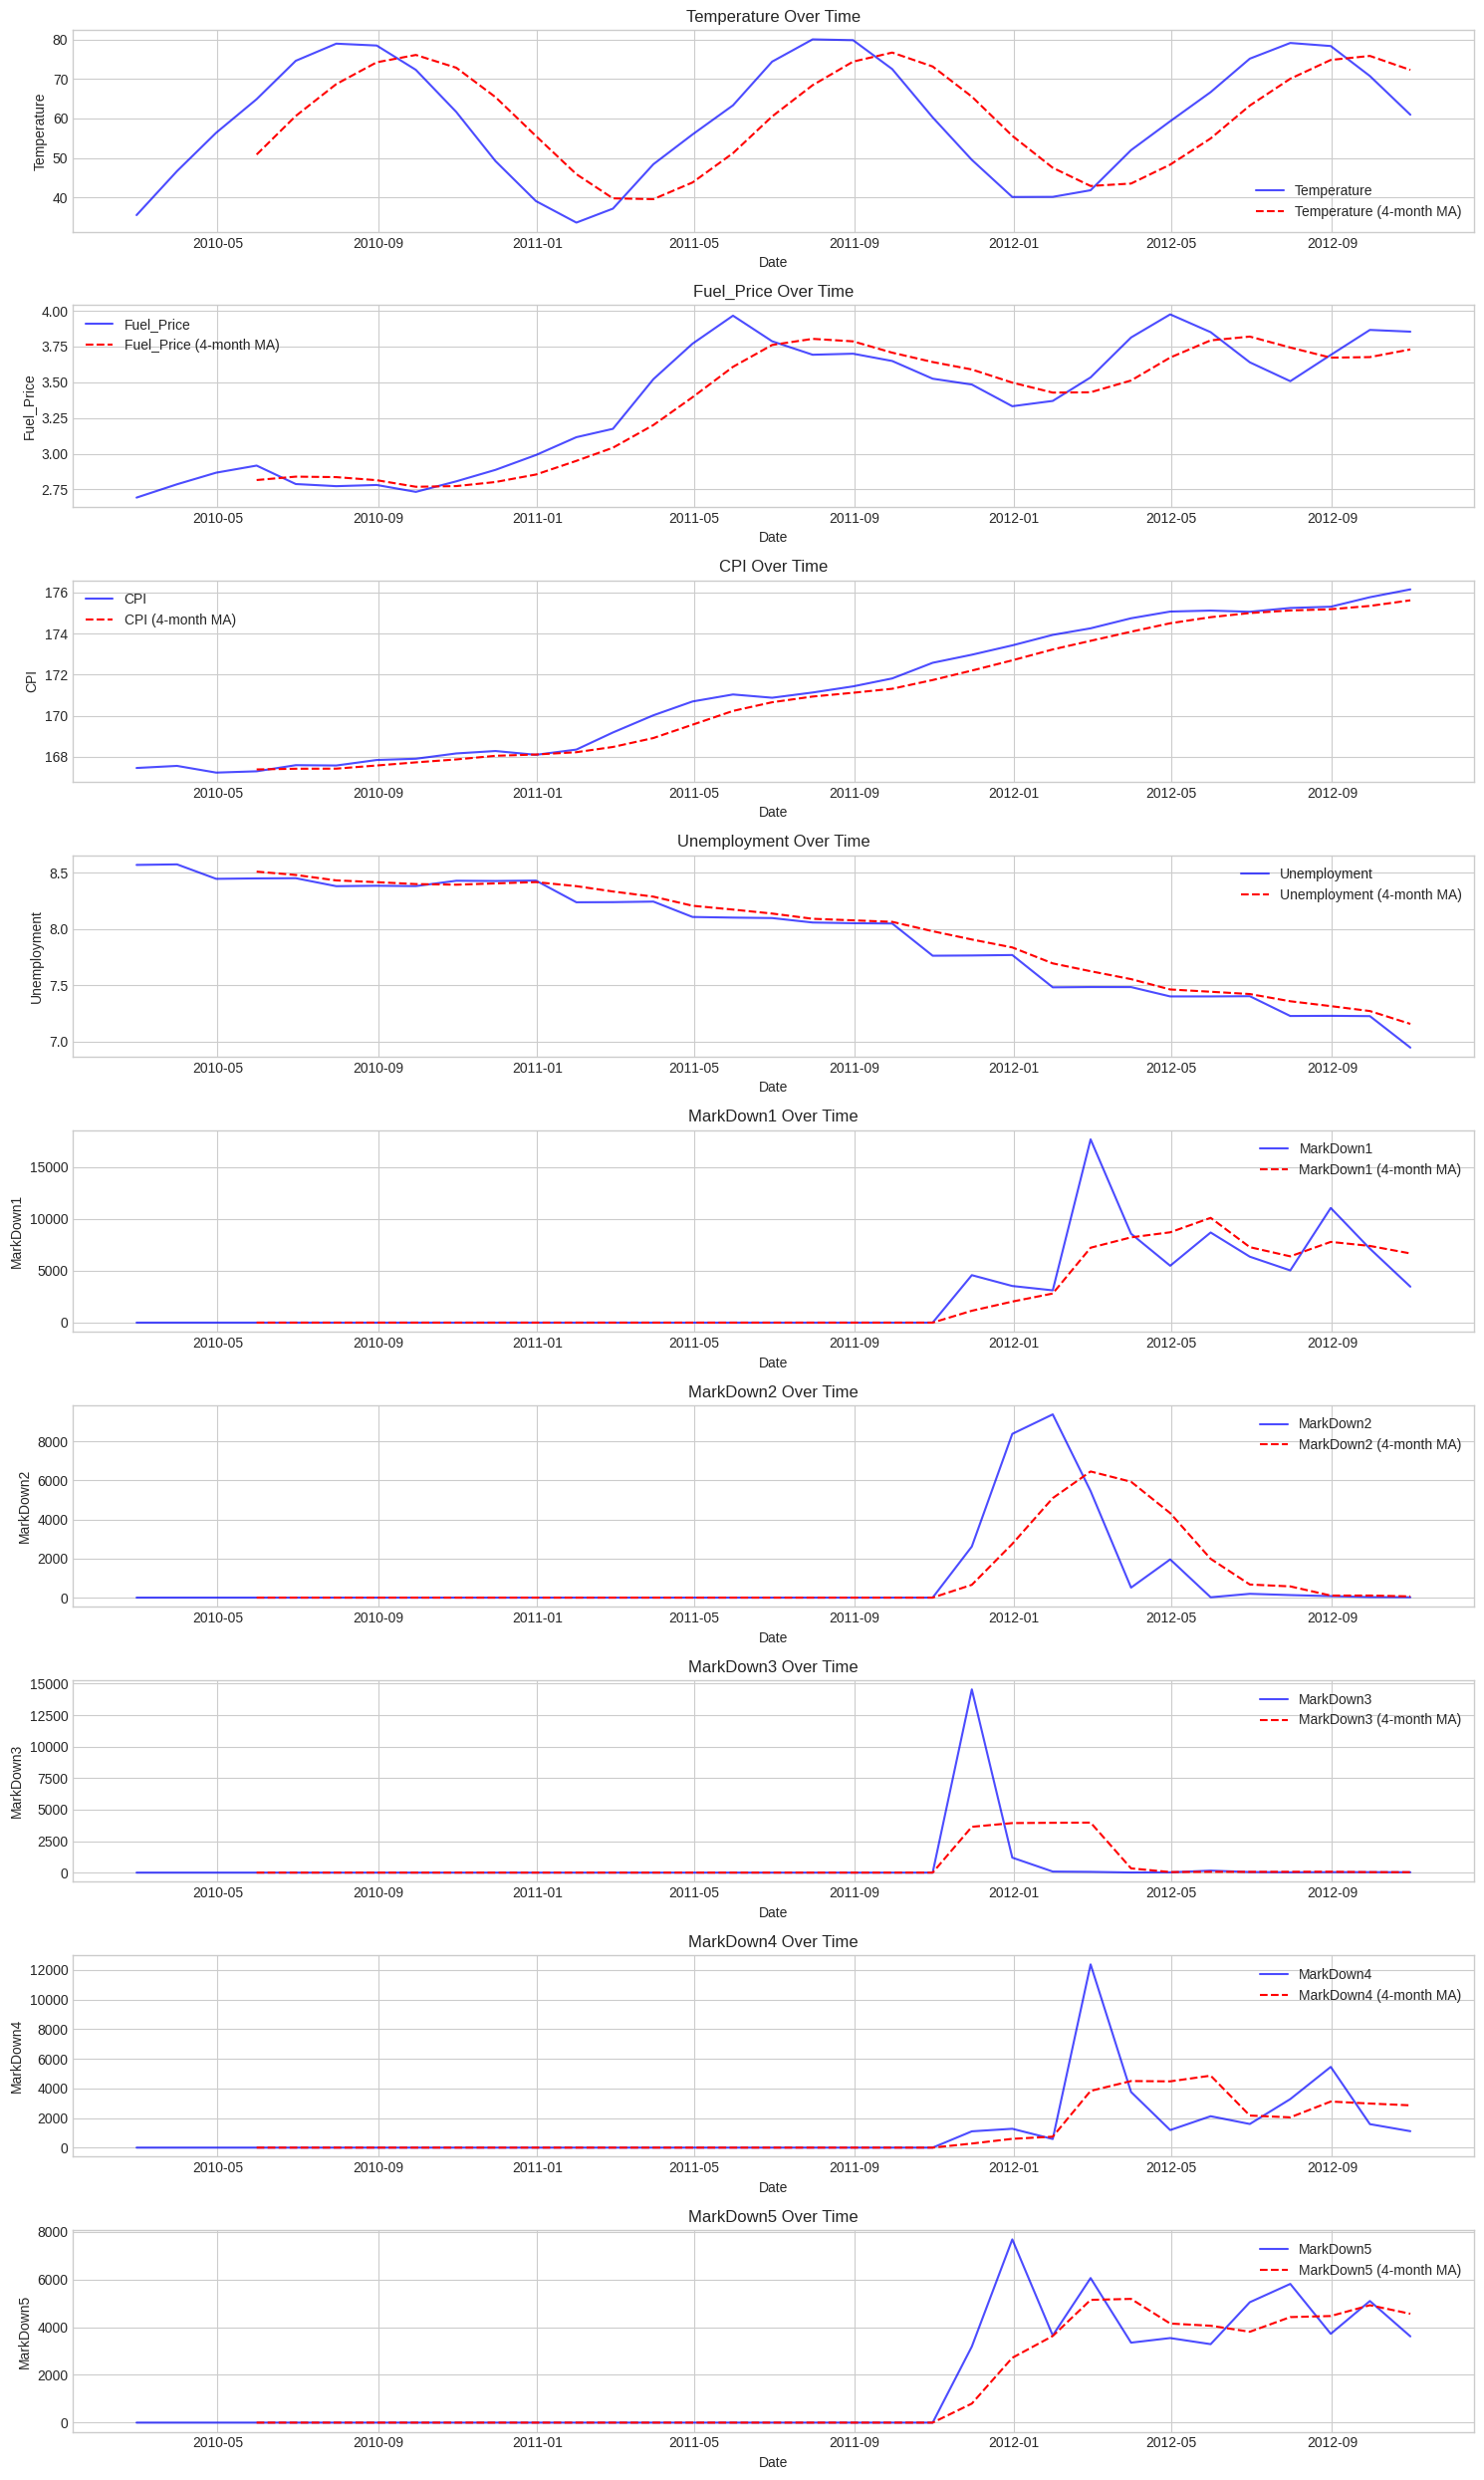

In [ ]:
# Resample data by month for clarity
df_resampled = df_all_train.resample('M', on='Date').mean()

# Set figure size for better visibility
plt.figure(figsize=(15, 25))

# Define the columns to plot
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Loop through each feature and create a subplot
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)  # Create a subplot for each feature

    # Plot the resampled data
    plt.plot(df_resampled.index, df_resampled[feature], label=feature, color='blue', alpha=0.7)

    # Optionally add a rolling mean (4-month window)
    rolling_mean = df_resampled[feature].rolling(window=4).mean()
    plt.plot(df_resampled.index, rolling_mean, label=f'{feature} (4-month MA)', color='red', linestyle='--')

    # Add title and labels
    plt.title(f'{feature} Over Time', fontsize=12)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend(loc='best')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

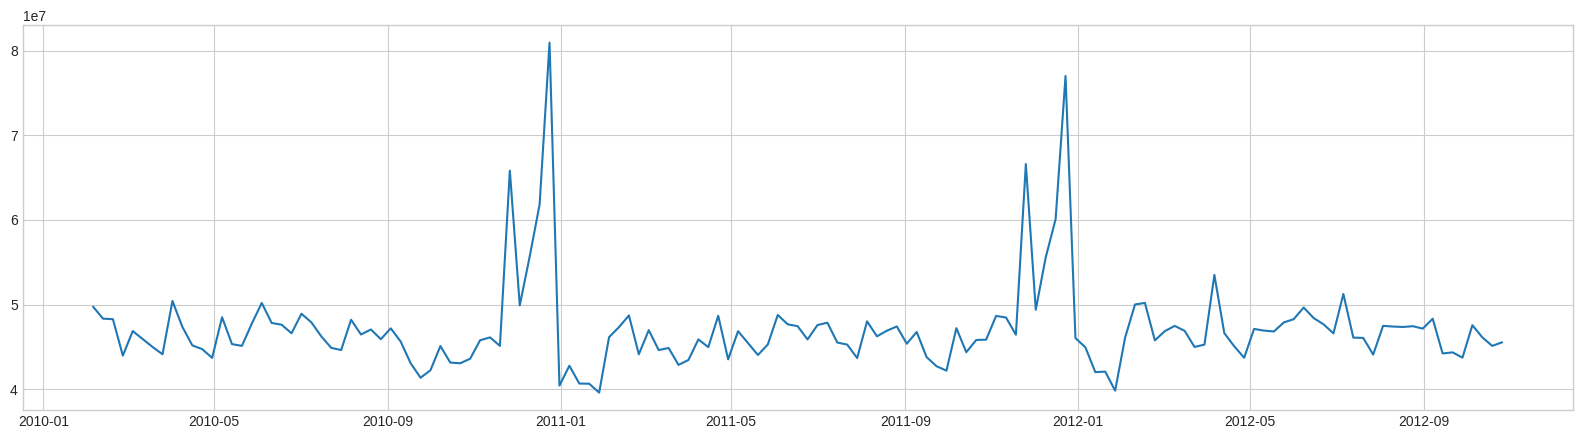

In [ ]:
# Average weekly sales for the stores/departments during a week
df_average_sales_weekly = df_all_train.groupby(by=["Date"], as_index = False)["Weekly_Sales"].sum()

df_average_sales = df_average_sales_weekly.sort_values("Weekly_Sales", ascending=False)

#print(df_average_sales[:10])

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_weekly.Date, df_average_sales_weekly.Weekly_Sales)
plt.show

In [ ]:
df_all_train["month"] = df_all_train['Date'].dt.month
df_all_train = df_all_train.drop(["Date"], axis=1)
df_all_train = pd.get_dummies(df_all_train, columns=["month"])#, prefix='month')
#df_all_train = df_all_train.drop('Date', 1)

df_all_test["month"] = df_all_test['Date'].dt.month
df_all_test = df_all_test.drop(["Date"], axis=1)
df_all_test = pd.get_dummies(df_all_test, columns=["month"])#, prefix='month')
#df_all_test = df_all_test.drop('Date', 1)

<Axes: >

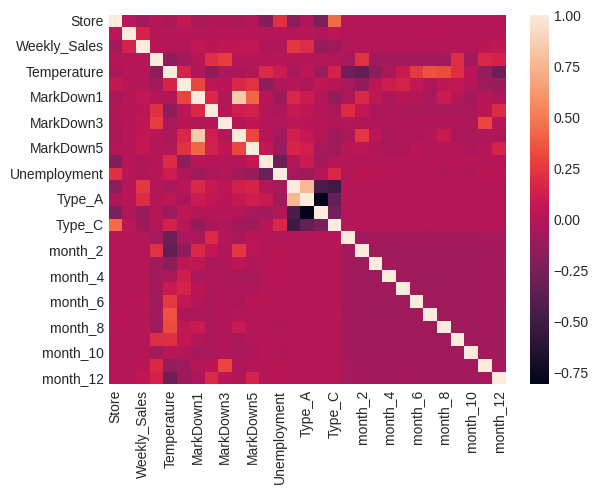

In [ ]:
# Correlation between all features
sns.heatmap(df_all_train.corr())

In [ ]:
# Correlation between Weekly Sales and all other features
df_all_train_corr = df_all_train[df_all_train.columns[:]].corr()['Weekly_Sales'][:]
df_all_train_corr = df_all_train_corr.drop("Weekly_Sales")
df_all_train_corr

,Weekly_Sales
Store,-0.085195
Dept,0.148032
IsHoliday,0.012774
Temperature,-0.002312
Fuel_Price,-0.000120
MarkDown1,0.047172
MarkDown2,0.020716
MarkDown3,0.038562
MarkDown4,0.037467
MarkDown5,0.050465


<Axes: >

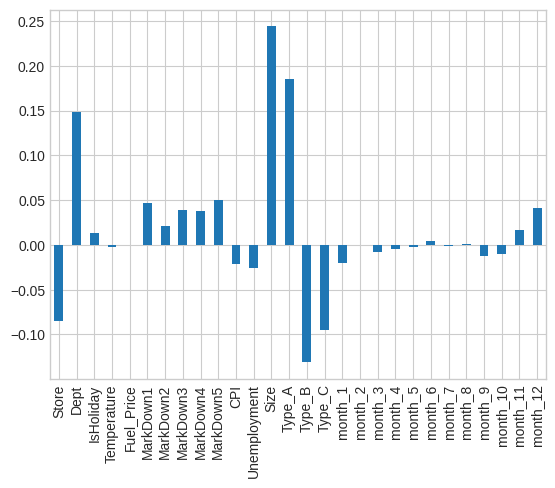

In [ ]:
# Plot the correlation
df_all_train_corr.plot.bar()

# **3. Create Train & Test Data.**

In [ ]:
# DF x & y
train_all = df_all_train # make it shorter syntax

train_X = df_all_train.drop(["Weekly_Sales", "month_8", "month_9", "month_10"], axis=1)
train_y = train_all["Weekly_Sales"]
test_X = df_all_test # making the syntax shorter --> Sub = submission

X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.2, shuffle=False, stratify=None)

In [ ]:
#X_train.shape
#X_test.shape

X_train.head(3)
#y_train.head(3)

#X_test.head(3)
#y_test.head(3)

#test_X.head(3)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Type_C,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_11,month_12
0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,False,True,False,False,False,False,False,False,False
1,1,1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,...,0,False,True,False,False,False,False,False,False,False
2,1,1,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,...,0,False,True,False,False,False,False,False,False,False


# **6. Modeling**

In [ ]:
#Linear Regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  11901.122870740897
MSE:  342248650.7895187
RMSE:  18499.963534815917
R^2: 0.055025472832819444


In [ ]:
#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn import metrics

# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

In [ ]:
#Decision Tree Regressor¶
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  5147.281368100196
MSE:  118559607.10307135
RMSE:  10888.508029251361
R^2: 0.6726479172236298


In [ ]:
#Random Forest Regressor¶
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  4525.549079748323
MSE:  89328858.92216814
RMSE:  9451.394549068838
R^2: 0.7533562337568614


In [ ]:
#Extra Trees Regressor
etr_random_best = ExtraTreesRegressor(bootstrap=False, criterion="squared_error", max_depth=None,
                                      max_features=1.0, # Changed max_features to 1.0 which considers all features
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=2, min_samples_split=5,
                                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=30,
                                      oob_score=False, random_state=None, warm_start=False)
etr_random_best.fit(X_train, y_train)


ExtraTreesRegressor(min_samples_leaf=2, min_samples_split=5, n_jobs=30)

In [ ]:
y_pred = etr_random_best.predict(X_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  4525.549079748323
MSE:  89328858.92216814
RMSE:  9451.394549068838
R^2: 0.7533562337568614


In [ ]:
#XGBoost¶
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  6067.949981846761
MSE:  99567950.9220532
RMSE:  9978.374162259763
R^2: 0.7250853228302816


In [ ]:
#Ridge¶
rid = Ridge()
rid.fit(X_train, y_train)
y_pred = rid.predict(X_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  11901.011496682167
MSE:  342248786.13783234
RMSE:  18499.9671928853
R^2: 0.055025099125842525


In [ ]:
#Lasso¶
las = Lasso()
las.fit(X_train, y_train)
y_pred = las.predict(X_test)

In [ ]:
# Print out the MAE, MSE & RMSE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred)) #MAE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred)) #MSE
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #RMSE

# rSquared
score = r2_score(y_test, y_pred)
print("R^2:", score)

MAE:  11893.238864146217
MSE:  342279406.91580373
RMSE:  18500.794764436574
R^2: 0.05494055283145016


# **6. Summarising Results & Optimal Model**
***ACCURACY:***

**Best performer**:
 Extra Trees Regressor

**Worst performer**:
 Ridge Regressor Model

***ROBUSTNESS:***

**Best performer**:
Extra Trees Regressor

**Worst performer**:
Linear Regression

#**7. Further Exploration Of Data**

Comparing sales during holidays and Non-holidays

Average Sales during Holidays: $17,035.82
Average Sales during Non-Holidays: $15,901.45


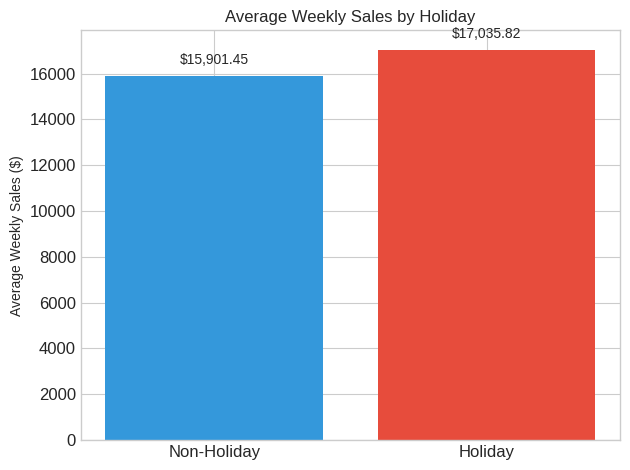

T-statistic: 7.0007, P-value: 0.0000
Statistically significant.


In [ ]:
# Group data and calculate mean sales
avg_sales_by_holiday = df_all_train.groupby('IsHoliday')['Weekly_Sales'].mean()

# Print results
print(f"Average Sales during Holidays: ${avg_sales_by_holiday[1]:,.2f}")
print(f"Average Sales during Non-Holidays: ${avg_sales_by_holiday[0]:,.2f}")

# Create bar plot
plt.bar(['Non-Holiday', 'Holiday'], avg_sales_by_holiday.values, color=['#3498db', '#e74c3c'])
plt.title('Average Weekly Sales by Holiday')
plt.ylabel('Average Weekly Sales ($)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for i, value in enumerate(avg_sales_by_holiday.values):
    plt.text(i, value + 500, f"${value:,.2f}", ha='center')
plt.tight_layout()
plt.show()

# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_all_train[df_all_train['IsHoliday'] == 1]['Weekly_Sales'],
                            df_all_train[df_all_train['IsHoliday'] == 0]['Weekly_Sales'], equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
print("Statistically significant." if p_value < 0.05 else "Not statistically significant.")


**This shows that sales during holiday week are more, as compared to that during non-holiday week.**

#**Analyzing how changes in CPI and unemployment relate to overall sales trends**

<ipython-input-129-34ecf6fd4814>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_by_range = df_all_train.groupby('Economic_Range')['Weekly_Sales'].mean()


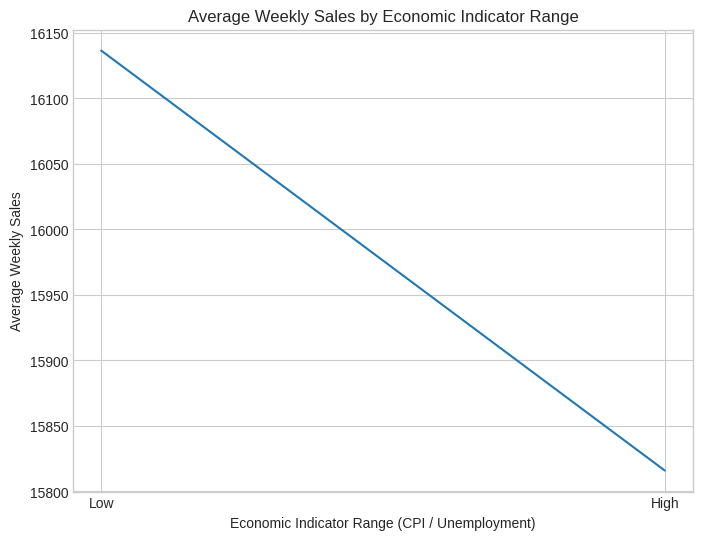

In [ ]:
import matplotlib.pyplot as plt

# Create a combined economic indicator
df_all_train['Economic_Indicator'] = df_all_train['CPI'] / df_all_train['Unemployment']

# Calculate average weekly sales for different ranges of the economic indicator
bins = [df_all_train['Economic_Indicator'].min(),
        df_all_train['Economic_Indicator'].mean(),
        df_all_train['Economic_Indicator'].max()]
df_all_train['Economic_Range'] = pd.cut(df_all_train['Economic_Indicator'], bins=bins, labels=['Low', 'High'])
avg_sales_by_range = df_all_train.groupby('Economic_Range')['Weekly_Sales'].mean()

# Create a line graph
plt.figure(figsize=(8, 6))
plt.plot(avg_sales_by_range.index, avg_sales_by_range.values)
plt.title('Average Weekly Sales by Economic Indicator Range')
plt.xlabel('Economic Indicator Range (CPI / Unemployment)')
plt.ylabel('Average Weekly Sales')
plt.show()

Greater the CPI/Unemployment ratio, greater are the sales. This is due to the fact that greater CPI enables people to purchase more, and unemployment reduces the sales.

#**Analyzing Sale Trends of Different Stores**

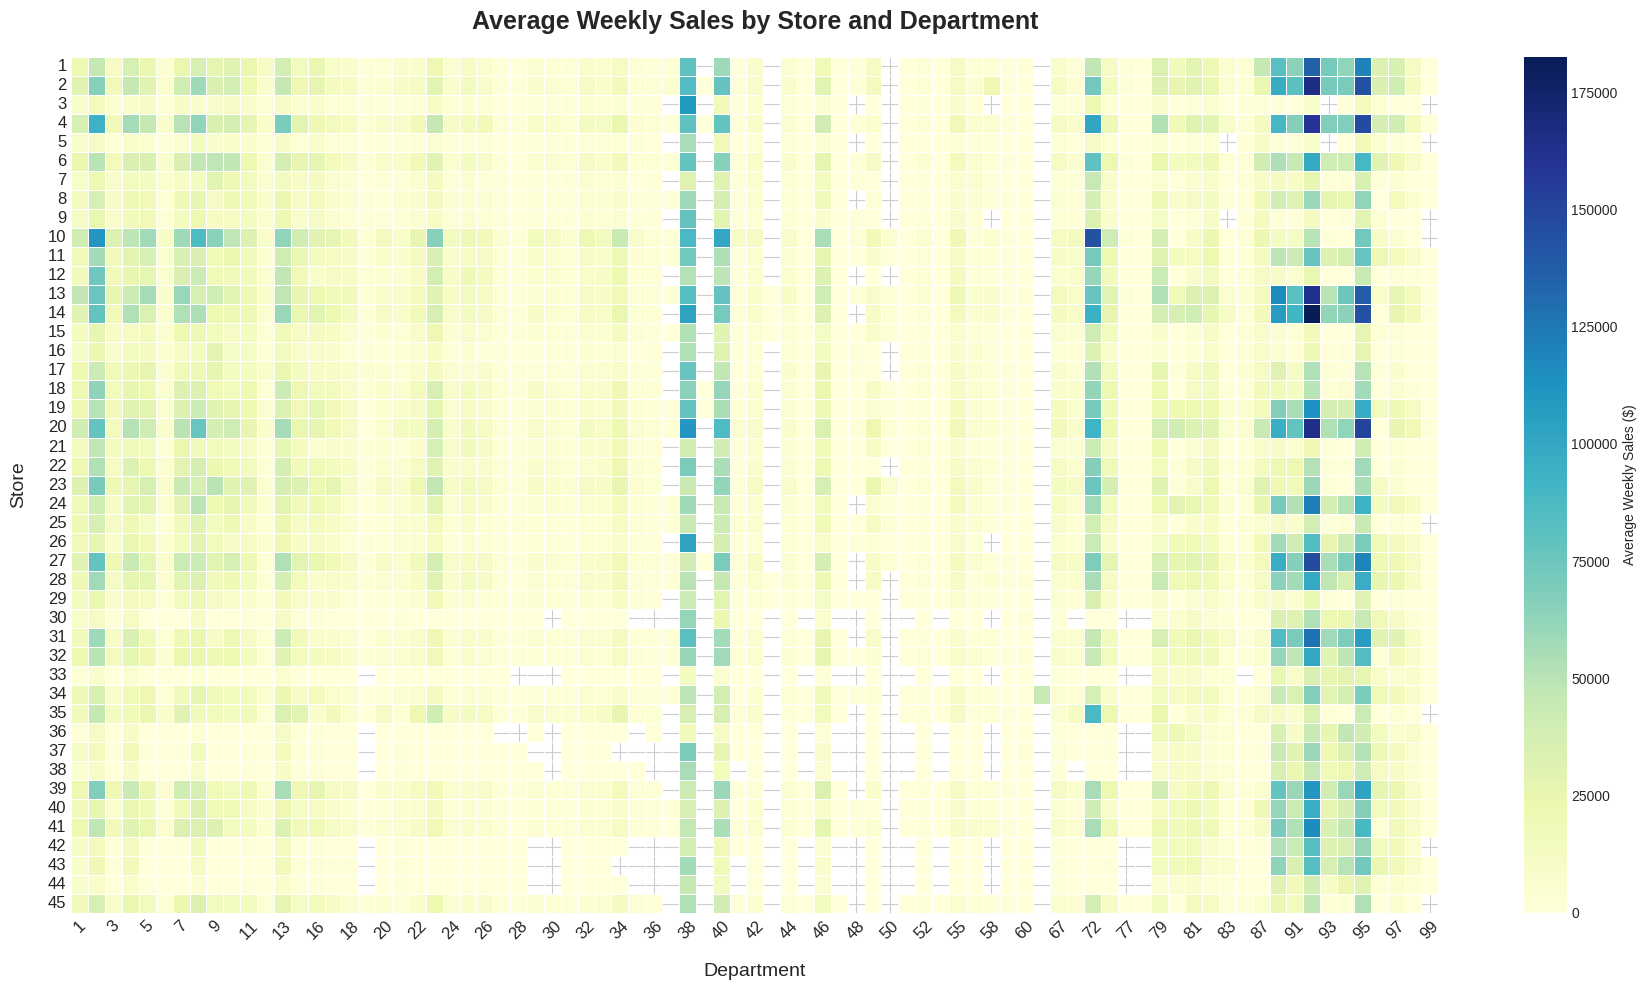

In [ ]:
# Group data by store and department, then calculate average weekly sales
avg_sales_by_store_dept = df_all_train.groupby(["Store", "Dept"])["Weekly_Sales"].mean()

# Unstack to prepare for heatmap visualization
avg_sales_by_store_dept = avg_sales_by_store_dept.unstack()

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(avg_sales_by_store_dept, annot=False, cmap="YlGnBu", cbar_kws={'label': 'Average Weekly Sales ($)'}, linewidths=0.5)

# Customizing the title and labels for better visualization
plt.title("Average Weekly Sales by Store and Department", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Department", fontsize=14, labelpad=15)
plt.ylabel("Store", fontsize=14, labelpad=15)

# Customize the color bar and axis ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

plt.show()


#**Plotting a Graph for Sales VS Stores**

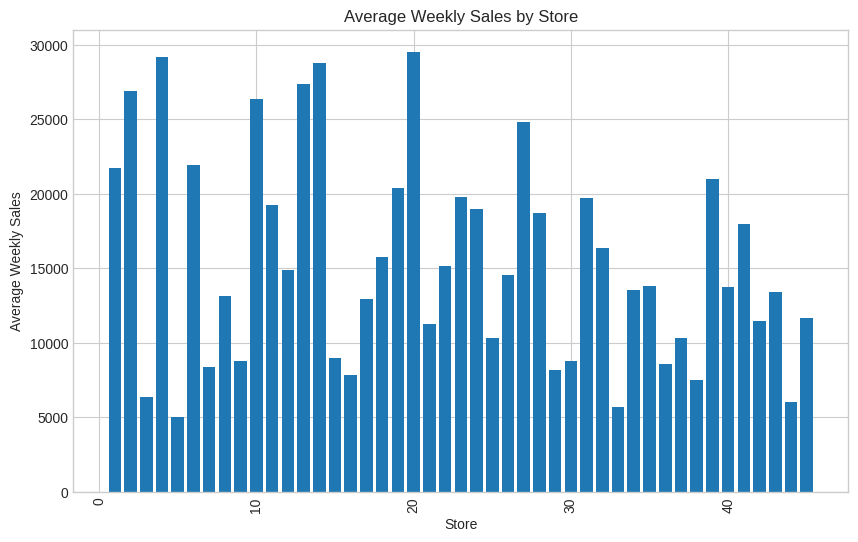

In [ ]:
# Calculate average sales per store
avg_sales_by_store = df_all_train.groupby("Store")["Weekly_Sales"].mean()

# Create a bar plot for average sales per store
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_by_store.index, avg_sales_by_store.values)
plt.title("Average Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.show()



**result: Store 20 has the highest sales.**

#**Graph For all departments of Store 20**

Note: Store 20 is the one with the highest sales

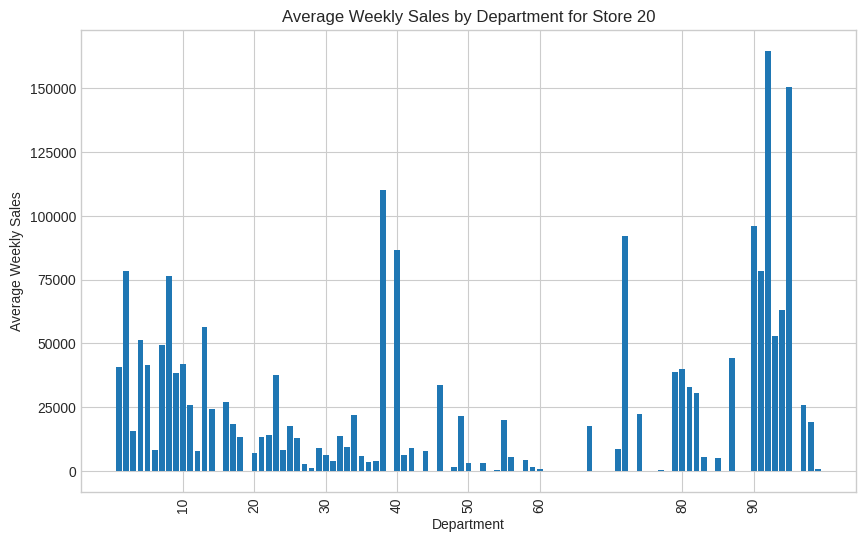

In [ ]:
# Filter data for store 20
store_20_data = df_all_train[df_all_train["Store"] == 20]

# Group data by department and calculate average weekly sales
avg_sales_by_dept = store_20_data.groupby("Dept")["Weekly_Sales"].mean()

# Create a bar plot for average sales per department in store 20
plt.figure(figsize=(10, 6))
plt.bar(avg_sales_by_dept.index, avg_sales_by_dept.values)
plt.title("Average Weekly Sales by Department for Store 20")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")

# Select department numbers that are multiples of 10
xticks = [dept for dept in avg_sales_by_dept.index if dept % 10 == 0]
plt.xticks(xticks, rotation=90)  # Set xticks to show multiples of 10

plt.show()



**Results: The department with the highest total sales in store 20 is dept 92**

#**Analyzing Different Discounts offered during markdowns**

In [ ]:
# Calculate total markdown for each week
df_all_train['Total_Markdown'] = df_all_train['MarkDown1'] + df_all_train['MarkDown2'] + df_all_train['MarkDown3'] + df_all_train['MarkDown4'] + df_all_train['MarkDown5']

# Create a markdown flag
df_all_train['Markdown_Flag'] = df_all_train['Total_Markdown'].apply(lambda x: 1 if x > 0 else 0)

# Calculate average markdown amount when there is a markdown
avg_markdown_amount = df_all_train[df_all_train['Markdown_Flag'] == 1]['Total_Markdown'].mean()

# Print the result
print(f"Average Discount Offered During Markdowns: {avg_markdown_amount:.2f}")

Average Discount Offered During Markdowns: 18607.63


#**Measuring the effectiveness of Markdowns in Boosting Sales**

Average Sales with Markdown: 16177.02
Average Sales without Markdown: 15871.52
Percentage Increase in Sales due to Markdowns: 1.92%


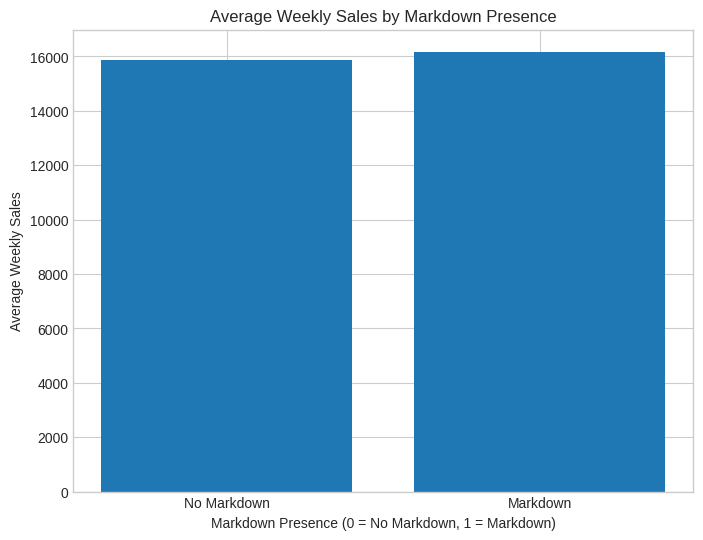

In [ ]:
# Calculate total markdown for each week
df_all_train['Total_Markdown'] = df_all_train['MarkDown1'] + df_all_train['MarkDown2'] + df_all_train['MarkDown3'] + df_all_train['MarkDown4'] + df_all_train['MarkDown5']

# Create a markdown flag (1 if there is any markdown, 0 otherwise)
df_all_train['Markdown_Flag'] = df_all_train['Total_Markdown'].apply(lambda x: 1 if x > 0 else 0)

# Group data by markdown flag and calculate average weekly sales
avg_sales_by_markdown = df_all_train.groupby('Markdown_Flag')['Weekly_Sales'].mean()

# Calculate the percentage increase in sales due to markdowns
percentage_increase = ((avg_sales_by_markdown[1] - avg_sales_by_markdown[0]) / avg_sales_by_markdown[0]) * 100

# Print the results
print(f"Average Sales with Markdown: {avg_sales_by_markdown[1]:.2f}")
print(f"Average Sales without Markdown: {avg_sales_by_markdown[0]:.2f}")
print(f"Percentage Increase in Sales due to Markdowns: {percentage_increase:.2f}%")

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(avg_sales_by_markdown.index, avg_sales_by_markdown.values)
plt.title('Average Weekly Sales by Markdown Presence')
plt.xlabel('Markdown Presence (0 = No Markdown, 1 = Markdown)')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['No Markdown', 'Markdown'])
plt.show()

#**Analyzing how Markdowns are used in conjunction to holidays**

Average Markdown during Holiday Week: 15729.58
Average Markdown Before Holiday Week: 11244.61
Average Markdown After Holiday Week: 12392.75


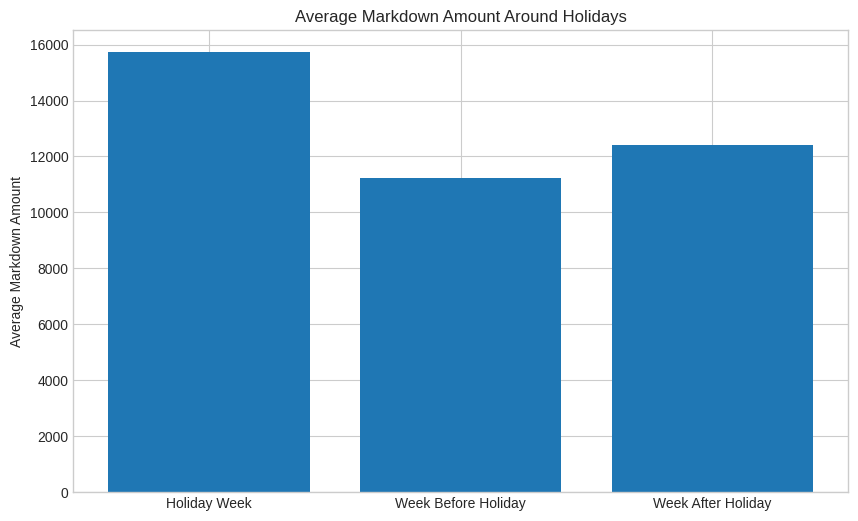

In [ ]:
# Calculate total markdown for each week
df_all_train['Total_Markdown'] = df_all_train['MarkDown1'] + df_all_train['MarkDown2'] + df_all_train['MarkDown3'] + df_all_train['MarkDown4'] + df_all_train['MarkDown5']

# Shift the IsHoliday column to check for markdowns the week before and after holidays
df_all_train['Holiday_Week_Before'] = df_all_train['IsHoliday'].shift(1).fillna(0).astype(int)
df_all_train['Holiday_Week_After'] = df_all_train['IsHoliday'].shift(-1).fillna(0).astype(int)

# Calculate average markdown for different holiday-related weeks
avg_markdown_holiday_week = df_all_train.groupby('IsHoliday')['Total_Markdown'].mean()
avg_markdown_before_holiday = df_all_train.groupby('Holiday_Week_Before')['Total_Markdown'].mean()
avg_markdown_after_holiday = df_all_train.groupby('Holiday_Week_After')['Total_Markdown'].mean()

# Print the results
print(f"Average Markdown during Holiday Week: {avg_markdown_holiday_week[1]:.2f}")
print(f"Average Markdown Before Holiday Week: {avg_markdown_before_holiday[1]:.2f}")
print(f"Average Markdown After Holiday Week: {avg_markdown_after_holiday[1]:.2f}")

# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))
plt.bar(['Holiday Week', 'Week Before Holiday', 'Week After Holiday'], [avg_markdown_holiday_week[1], avg_markdown_before_holiday[1], avg_markdown_after_holiday[1]])
plt.title('Average Markdown Amount Around Holidays')
plt.ylabel('Average Markdown Amount')
plt.show()

**More markdowns are offered by Walmart during the Holiday Week, less on week after holiday week, and least before holiday week. Maybe they are offering more during holiday week, so that people can purchase gifts for their friends and families, and also, food items are consumed more during holiday week, so, it is fruitful to give such markdowns.**

#**Analyzing the combined effects of Holidays and Markdowns on sales**

Average Weekly Sales by Holiday and Markdown:
 IsHoliday  Markdown_Flag
0          0                15816.567631
           1                16055.121800
1          0                16656.707302
           1                17594.490329
Name: Weekly_Sales, dtype: float64


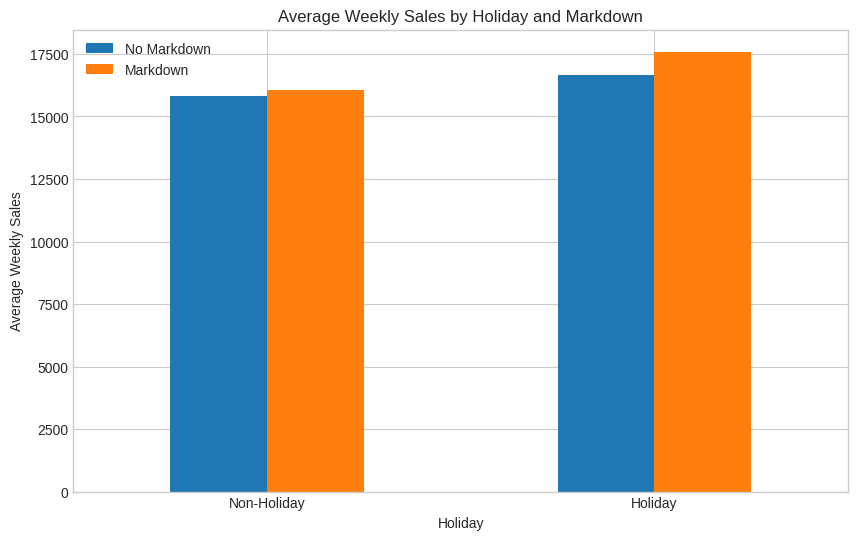

In [ ]:
# Calculate total markdown for each week
df_all_train['Total_Markdown'] = df_all_train['MarkDown1'] + df_all_train['MarkDown2'] + df_all_train['MarkDown3'] + df_all_train['MarkDown4'] + df_all_train['MarkDown5']

# Create a markdown flag (1 if there is any markdown, 0 otherwise)
df_all_train['Markdown_Flag'] = df_all_train['Total_Markdown'].apply(lambda x: 1 if x > 0 else 0)

# Group data by holiday and markdown flag and calculate average weekly sales
avg_sales_by_holiday_markdown = df_all_train.groupby(['IsHoliday', 'Markdown_Flag'])['Weekly_Sales'].mean()

# Print the results
print("Average Weekly Sales by Holiday and Markdown:\n", avg_sales_by_holiday_markdown)

# Create a bar plot to visualize the results
avg_sales_by_holiday_markdown.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Average Weekly Sales by Holiday and Markdown')
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.legend(['No Markdown', 'Markdown'])
plt.show()


***Sales are more duing holiday week, and also more when mark downs are offered. ***

#**Analyzing Sales of Each Month**

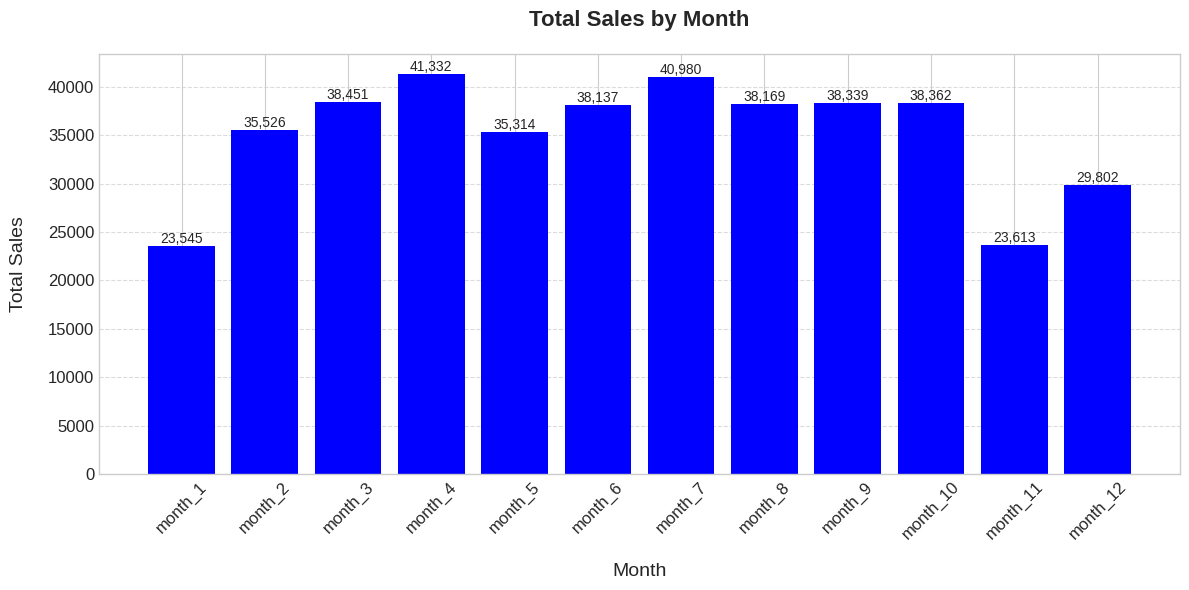

In [ ]:
# Calculate total sales for each month
monthly_sales = df_all_train[['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
                               'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']].sum()

# Create a bar plot with improved aesthetics
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_sales.index, monthly_sales.values, color='blue')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

# The plot
plt.title('Total Sales by Month', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, labelpad=15)
plt.ylabel('Total Sales', fontsize=14, labelpad=15)

# Customize the x-ticks for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**On average, most sales are in the month of April. This might be due to the fact that Easter is in April. Still, I think December should also have had more sales, due to Chirstmas, so, can't be sure if we can observe something definite from sales by month data.**